(224, 224)
(224, 224)


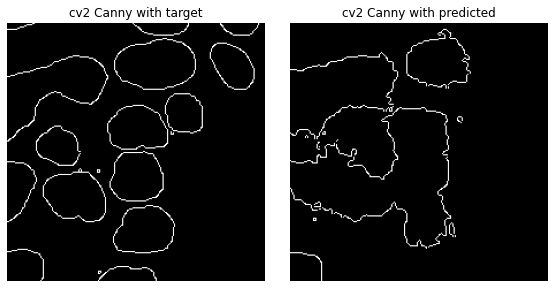

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
#from skimage import filters
import cv2 as cv

os.chdir("/mnt/c/Users/rosie/WSL/seg_epi/")

def mask_outlines(filename):

    image = np.array(Image.open(filename))
    print(image.shape)
    kernel = np.ones((3, 3), 'uint8')
    image = cv.dilate(image, kernel)
    image = cv.erode(image, kernel)
    edges = cv.Canny(image, 1, 254)

    return edges

edges = mask_outlines("targ_img3.png")
edges_pred = mask_outlines("pred_img3.png")

fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True,
                         figsize=(8, 4))

axes[0].imshow(edges, cmap=plt.cm.gray)
axes[0].set_title('cv2 Canny with target')

axes[1].imshow(edges_pred, cmap=plt.cm.gray)
axes[1].set_title('cv2 Canny with predicted')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()


(224, 224, 3)
(224, 224)


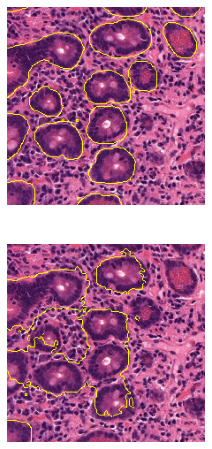

In [5]:
orig_img = np.array(Image.open("orig_img3.png"))

idx = edges[:, :] == 255
orig_targ = orig_img.copy()
orig_targ[idx] = (255, 255, 0)

print(orig_img.shape)
print(edges.shape)

idx = edges_pred[:, :] == 255
orig_pred = orig_img.copy()
orig_pred[idx] = (255, 255, 0)

fig, axes = plt.subplots(nrows=2, sharex=True, sharey=True,
                         figsize=(4, 8))

axes[0].imshow(orig_targ)
#axes[0].imshow(targ_img, alpha = 0.2)
axes[1].imshow(orig_pred)
#axes[1].imshow(pred_img, alpha = 0.2)
for ax in axes:
    ax.axis('off')
plt.show()

# plt.imshow()
# plt.show()

In [ ]:
'''
From StackOverflow:
https://stackoverflow.com/questions/65791502/how-to-overlay-outline-image-with-transparent-background-and-filling
'''

import cv2

# Open overlay image, and its dimensions
overlay_img = cv2.imread('1W7HZ.png', cv2.IMREAD_UNCHANGED)
h, w = overlay_img.shape[:2]

# In this special case, take the alpha channel of the overlay image, and
# check for value 255; idx is a Boolean array
idx = overlay_img[:, :, 3] == 255

# Open image to work on
img = cv2.imread('path/to/your/image.jpg')

# Position for overlay image
top, left = (50, 50)

# Access region of interest with overlay image's dimensions at position
#   img[top:top+h, left:left+w]   and there, use Boolean array indexing
# to set the color to red (for example)
img[top:top+h, left:left+w, :][idx] = (0, 0, 255)

# Save image
cv2.imwrite('output.png', img)